# An example showing how different modules work

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
import sys
sys.path.append('../modules/')

In [4]:
%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

2024-10-02 10:44:45.236853: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 10:44:45.236883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 10:44:45.238212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
#dtree = datasets.read_filtered_datatree()
#dtree = datasets.calculate_magnitudes(dtree)

## Setup experiment

In [6]:
# We need one place to save all the experiment relevant info.  
experiment_config= {'simulation_names':['P2L'], 
                    'filter_scales':['50','100','200','400'],
                    'window_size':3, 
                    'all_ml_variables' : ['dudx_widened',  
                                          'dvdx_widened', 
                                          'dudy_widened',
                                          'dvdy_widened',
                                          'dhdx_widened',
                                          'dhdy_widened',
                                          'filter_scale', 
                                          'uphp',
                                          'vphp'], 
                    
                    'input_channels' : ['dudx_widened',  
                                          'dvdx_widened', 
                                          'dudy_widened',
                                          'dvdy_widened',
                                          'dhdx_widened',
                                          'dhdy_widened',
                                          'filter_scale'],
                    
                    'output_channels' : ['uphp',
                                          'vphp'],
                    'coeff_channels'  : [], 
        
                    'train_time_range': slice(0, 640),
                    'test_time_range' : slice(-64, None),
                    'num_train_batches': 37, 
                    'num_test_batches' : 5, 

                    'num_inputs': 55, 
                    'network_shape': [36, 36, 2],

                    'exp_ckpt_save_dir': '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/test_ckpt'
                    
            }

## SimulationData Module
#### Load data for different simulations and prepare it with right variables and non-dims.

In this step all the variables and extra dimensions may be created that were not originally present. 
Each input and output variable gets its own containing variable (e.g. if top and bottom layer were two separate inputs, then in this step they may get separated out). 
Other examples might be that rotated variables, or magnitudes become their own variables in this step. 

In [7]:
#DT = datasets.SimulationData(simulation_names=['P2L', 'DG'], filter_scales=['50','100','200','400'])
DT = datasets.SimulationData(simulation_names=experiment_config['simulation_names'], 
                             filter_scales=experiment_config['filter_scales'], 
                             window_size = experiment_config['window_size'])

In [8]:
DT.simulation_data

DataTree('None', parent=None)
└── DataTree('P2L')
    ├── DataTree('50')
    │       Dimensions:                      (Time: 7200, xh: 150, yh: 200, zl: 2, Xn: 3,
    │                                         Yn: 3, zi: 3)
    │       Coordinates:
    │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
    │         * xh                           (xh) float64 1kB 4.0 12.0 ... 1.196e+03
    │         * yh                           (yh) float64 2kB 4.0 12.0 ... 1.596e+03
    │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
    │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables: (12/40)
    │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dvdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dhdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dhdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           ...                           ...
    │           dvdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dvdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dhdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           dhdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 31GB dask.array<chunksize=(36, 2, 199, 149, 3, 3), meta=np.ndarray>
    │           uphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 199, 149), meta=np.ndarray>
    │           vphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 199, 149), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  P2L
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
    │           description:      Dataset for P2L experiment at 50 km resolution
    ├── DataTree('100')
    │       Dimensions:                      (Time: 7200, xh: 60, yh: 80, zl: 2, Xn: 3,
    │                                         Yn: 3, zi: 3)
    │       Coordinates:
    │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
    │         * xh                           (xh) float64 480B 10.0 30.0 ... 1.19e+03
    │         * yh                           (yh) float64 640B 10.0 30.0 ... 1.59e+03
    │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
    │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables: (12/40)
    │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 5GB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
    │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 5GB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
    │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 5GB dask.array<chunksize=(36, 2, 79, 59, 3, 3), meta=np.ndarray>
   

## MLXarrayDAtaset 

Go from simulation data to batchesm but still as Xarray objects. 
In this step things like dropping extra points, masking of data etc happen. 

In [9]:
ML_DT_train = datasets.MLXarrayDataset(simulation_data=DT, 
                                       all_ml_variables=experiment_config['all_ml_variables'],
                                       time_range=experiment_config['train_time_range'],
                                       num_batches = experiment_config['num_train_batches'])

Will load : 0.85888 gb into memory.
load took: 20.7412 seconds


In [10]:
ML_DT_test = datasets.MLXarrayDataset(simulation_data=DT,
                                      all_ml_variables=experiment_config['all_ml_variables'],
                                      time_range=experiment_config['test_time_range'],
                                      num_batches = experiment_config['num_test_batches'])


Will load : 0.085888 gb into memory.
load took: 2.7912 seconds


In [11]:
len(ML_DT_train.ml_batches), len(ML_DT_test.ml_batches) 

(37, 5)

In [26]:
ML_DT_train.ml_batches[0]

<xarray.Dataset> Size: 16MB
Dimensions:       (Xn: 3, Yn: 3, points: 32380)
Coordinates:
  * points        (points) object 259kB MultiIndex
  * Time          (points) object 259kB 0005-11-26 00:00:00 ... 0007-12-16 00...
  * xh            (points) float64 259kB 90.0 360.0 452.0 ... 570.0 890.0 810.0
  * yh            (points) float64 259kB 490.0 440.0 516.0 ... 810.0 490.0 490.0
  * zl            (points) float64 259kB 1.031e+03 1.031e+03 ... 1.031e+03
Dimensions without coordinates: Xn, Yn
Data variables:
    dudx_widened  (Xn, Yn, points) float64 2MB 1.877e-06 ... -2.17e-06
    dvdx_widened  (Xn, Yn, points) float64 2MB 4.317e-07 3.935e-08 ... 9.846e-08
    dudy_widened  (Xn, Yn, points) float64 2MB 3.594e-06 7.443e-07 ... 9.064e-08
    dvdy_widened  (Xn, Yn, points) float64 2MB -1.96e-06 7.181e-08 ... 2.135e-06
    dhdx_widened  (Xn, Yn, points) float64 2MB 7.419e-05 9.461e-05 ... 0.0004903
    dhdy_widened  (Xn, Yn, points) float64 2MB 0.0002052 ... -0.0003431
    filter_scale  (points) float64 259kB 1e+05 4e+05 5e+04 ... 1e+05 1e+05 1e+05
    uphp          (points) float32 130kB -1.093 -18.52 0.9979 ... -0.3353 -1.197
    vphp          (points) float32 130kB 0.2608 4.111 -0.2562 ... 0.7536 -1.253
Attributes:
    simulation_name:  P2L
    filter_scale:     50
    source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
    description:      Dataset for P2L experiment at 50 km resolution

## MLJAXDataset 

### Convert these xbatcher batches to processed ones for training

This needs to take care of extra dims, like Xn,Yn.

In [13]:
import jax.numpy as jnp

In [14]:
batch_xr = ML_DT_train.ml_batches[0]

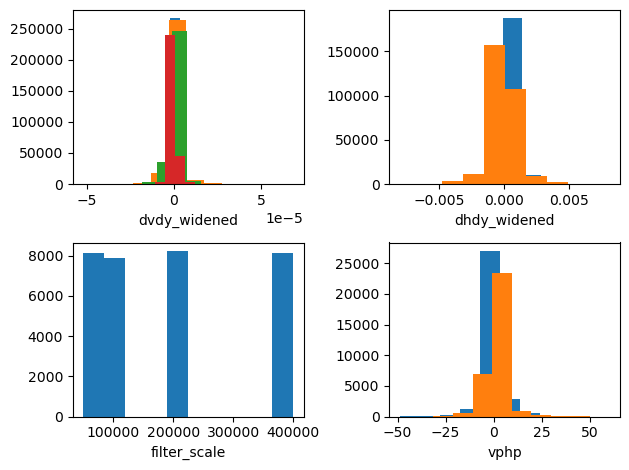

In [15]:
plt.subplot(221)
batch_xr[experiment_config['input_channels'][0]].plot.hist();
batch_xr[experiment_config['input_channels'][1]].plot.hist();
batch_xr[experiment_config['input_channels'][2]].plot.hist();
batch_xr[experiment_config['input_channels'][3]].plot.hist();

plt.subplot(222)
batch_xr[experiment_config['input_channels'][4]].plot.hist();
batch_xr[experiment_config['input_channels'][5]].plot.hist();

plt.subplot(223)
batch_xr[experiment_config['input_channels'][6]].plot.hist();

plt.subplot(224)
batch_xr.uphp.plot.hist();
batch_xr.vphp.plot.hist();

plt.tight_layout()

In [16]:
# Define the variables and assign normalizations 
normalize_data_dic = {
    'dudx': ([], 1e-6),  # scalar value
    'dvdx': ([], 1e-6),
    'dudy': ([], 1e-6),
    'dvdy': ([], 1e-6),
    'dhdx': ([], 1e-3),
    'dhdy': ([], 1e-3),
    'filter_scale': ([], 140e3),
    'uphp': ([], 4.),
    'vphp': ([], 4.),
    'dudx_widened': ([], 1e-6),  # scalar value
    'dvdx_widened': ([], 1e-6),
    'dudy_widened': ([], 1e-6),
    'dvdy_widened': ([], 1e-6),
    'dhdx_widened': ([], 1e-3),
    'dhdy_widened': ([], 1e-3),
}

ds_norm = xr.Dataset(normalize_data_dic)

In [17]:
train_ML_data = datasets.MLJAXDataset(ML_DT_train, 
                                      input_channels=experiment_config['input_channels'], 
                                      output_channels=experiment_config['output_channels'], 
                                      coeff_channels=experiment_config['coeff_channels'], 
                                      ds_norm=ds_norm)

In [18]:
test_ML_data = datasets.MLJAXDataset(ML_DT_test, 
                                      input_channels=experiment_config['input_channels'], 
                                      output_channels=experiment_config['output_channels'], 
                                      coeff_channels=experiment_config['coeff_channels'],
                                      ds_norm=ds_norm)

In [19]:
ML_data_combo = {'train_data':train_ML_data, 'test_data':test_ML_data}

In [20]:
for batch_out in ML_data_combo['train_data'].get_batches():
    print("Input (X) batch shape:", batch_out['X'].shape)
    print("Output (y) batch shape:", batch_out['y'].shape)
    
    # If you want to view a sample of the data
    #print("Sample X:", batch_out['X'])  # First sample of the batch
    #print("Sample y:", batch_out['y'])  # Corresponding label/target
    break  # Remove break to print more batches

Input (X) batch shape: (32380, 55)
Output (y) batch shape: (32380, 2)


## AnnRegressionSystem (and associated NN setup modules ArtificialNeuralNetwork and PointwiseANN).


In [21]:
num_in = batch_out['X'].shape[-1]
num_in

55

In [22]:
ANN_model = ML_classes.PointwiseANN(num_in = experiment_config['num_inputs'],
                                    shape = experiment_config['network_shape']) 

In [23]:
ANN_model.count_parameters()

3422


In [24]:
regress_sys = ML_classes.AnnRegressionSystem(ANN_model)

In [53]:
%%time 
regress_sys.train_system(ML_data_combo, num_epoch=41, print_freq=2)

At epoch 63. Train loss :  0.11479526999834422 , Test loss: 0.103397336602211
At epoch 65. Train loss :  0.11307237921534358 , Test loss: 0.10203547477722168
At epoch 67. Train loss :  0.11245531870706661 , Test loss: 0.1226362332701683
At epoch 69. Train loss :  0.10895123795883076 , Test loss: 0.1011165976524353
At epoch 71. Train loss :  0.10650650653484706 , Test loss: 0.10783486366271973
At epoch 73. Train loss :  0.12439322089021271 , Test loss: 0.11807867884635925
At epoch 75. Train loss :  0.10932787507772446 , Test loss: 0.09784414172172547
At epoch 77. Train loss :  0.10764390713459737 , Test loss: 0.09736794531345368
At epoch 79. Train loss :  0.10596691817045212 , Test loss: 0.09641280770301819
At epoch 81. Train loss :  0.10830985372130936 , Test loss: 0.10615736693143844
At epoch 83. Train loss :  0.10175569194394189 , Test loss: 0.09742294251918793
At epoch 85. Train loss :  0.1008455342537648 , Test loss: 0.0977894589304924
At epoch 87. Train loss :  0.10139157925103162

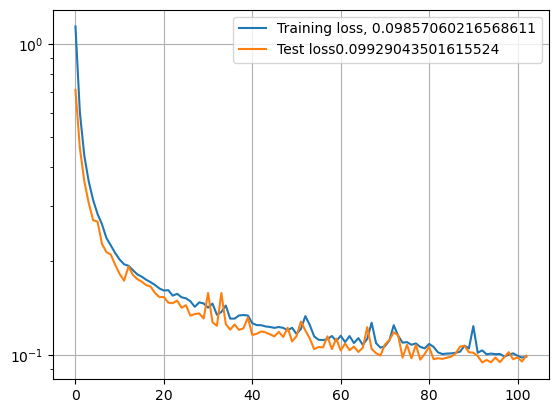

In [54]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.grid()
plt.yscale('log')
plt.legend()

In [55]:
regress_sys.save_checkpoint(experiment_config['exp_ckpt_save_dir'])

Testing around saving check points 

Check if data can be reloaded in, we do this in a new object.

In [56]:
new_regress_sys =  ML_classes.AnnRegressionSystem(ANN_model)

In [57]:
new_regress_sys.read_checkpoint(experiment_config['exp_ckpt_save_dir'])

Making predictions using some batch. 

In [58]:
y_true = batch_out['y']

In [59]:
y_pred = new_regress_sys.pred(batch_out['X'], batch_out['Xp'])

In [60]:
y_pred

Array([[-0.21545413, -0.03825574],
       [-4.038395  ,  0.59351546],
       [ 0.27862015, -0.17132735],
       ...,
       [-1.7693858 , -3.022526  ],
       [-0.03972283,  0.12999755],
       [-0.26900923, -0.30344707]], dtype=float32)

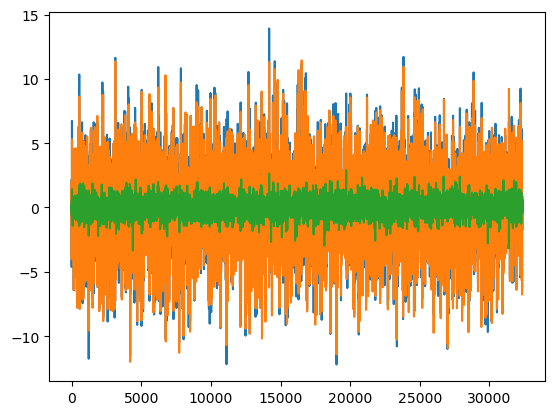

In [61]:
plt.plot(y_true[:,0])
plt.plot(y_pred[:,0])
plt.plot(y_true[:,0]- y_pred[:,0])

The above prediction method works, but we would like a little more functionality. 
We want to be able to make predictions on the original grids and structure of the data (e.g. at different scales), so we can track performance in real space (rather than sample space). To do all this, we will be developing an evaluation module. 

## Evaluation Module